<h2>IDS 576: Assignment 1</h2>

Generating graph for the given f(x) function.

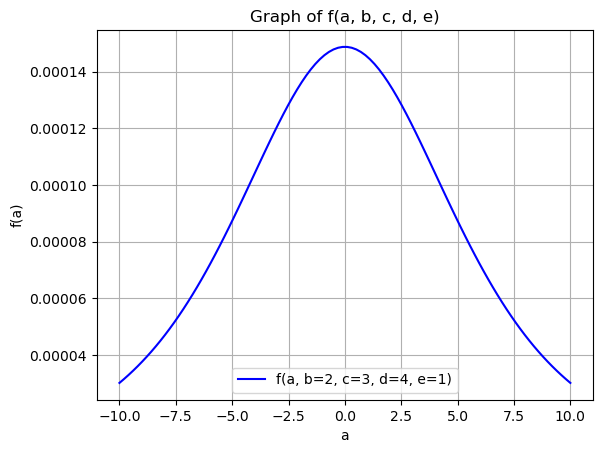

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(a, b, c, d, e):
    return 1 / ((1 + (a**b + c**d) * e)**2)  

# Fixed values for other variables
b = 2
c = 3
d = 4
e = 1

# Generate a values as a NumPy array
a = np.linspace(-10, 10, 100)  # 100 points for 'a'

# Compute y values
y = f(a, b, c, d, e) 

# Plot the function
plt.plot(a, y, label='f(a, b=2, c=3, d=4, e=1)', color='blue')

# Add labels and title
plt.xlabel('a')
plt.ylabel('f(a)')
plt.title('Graph of f(a, b, c, d, e)')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


<h3>Gradient Descent</h3>

**A function that calculates mean squared error between the prediction and the ground truth assuming both are numpy arrays**

In [18]:
def mean_square_error(predictions, truths):
    predictions = np.array(predictions)
    truths = np.array(truths)

    # Compute the Mean Squared Error
    mse = np.mean((predictions - truths) ** 2)
    return mse

**Consider a model: y = mx + c where m = 1 & c = 0 and x is between (0,1). Generating 100 values and ploting x and y**

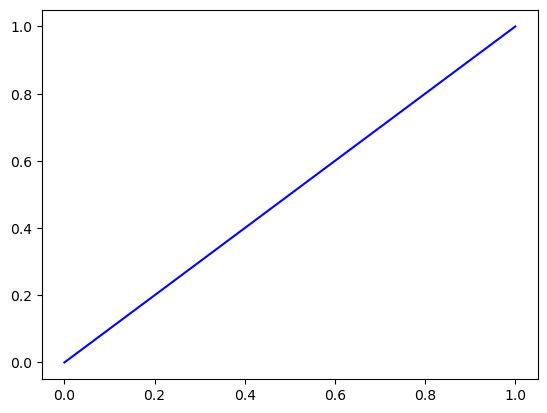

In [22]:
import numpy as np
import matplotlib.pyplot as plt

m,c = 1,0

x = np.linspace(0,1,100) #generating 100 values for x

y = m*x + c

plt.plot(x, y, label = "y = m*x + c plot", color = 'blue')

**Assuming we do not know the model parameters for the model y = m*x + c. We will use backpropagation and gradient descent to find model parameters.**

Iteration 0, Loss: 1.0897086179740645, m: 0.649263780645009, c: -0.5970722595602558
Iteration 100, Loss: 3.399051005040129e-06, m: 0.9938085868452511, c: 0.003318190293457626
Iteration 200, Loss: 2.2840442836342372e-07, m: 0.9983950437263025, c: 0.0008601510181843005
Iteration 300, Loss: 1.5347984722411767e-08, m: 0.9995839585283478, c: 0.0002229708692462568
Iteration 400, Loss: 1.0313312956577187e-09, m: 0.9998921525097159, c: 5.779916256711675e-05
Iteration 500, Loss: 6.930188299199936e-11, m: 0.9999720434573159, c: 1.498286841121211e-05
Iteration 600, Loss: 4.656845968472859e-12, m: 0.9999927530230255, c: 3.883903085455261e-06
Iteration 700, Loss: 3.129238837065944e-13, m: 0.9999981214173775, c: 1.0067967469638548e-06
Iteration 800, Loss: 2.1027398700170386e-14, m: 0.9999995130283041, c: 2.6098480495639057e-07
Iteration 900, Loss: 1.4129682016078023e-15, m: 0.9999998737657689, c: 6.765324652883727e-08


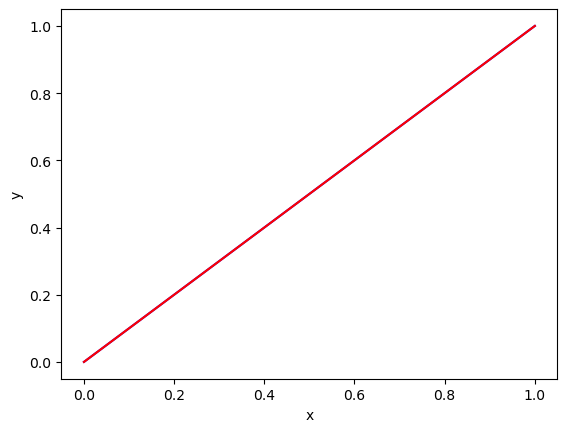

Final parameters - m: 0.9999999668324171, c: 1.777564333786202e-08


In [24]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1, 100)
y_true = x  # since y = x when m = 1, c = 0
m = np.random.randn()
c = np.random.randn()
learning_rate = 0.1
iterations = 1000


def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#this is using gradient descent
for i in range(iterations):
    # Predict y values using the current m and c
    y_pred = m * x + c
    
    #finding the error.
    loss = compute_loss(y_true, y_pred)
    
    #Compute gradients with respect to m and c
    dL_dm = -2 * np.mean(x * (y_true - y_pred))  #derivative of loss for m
    dL_dc = -2 * np.mean(y_true - y_pred)        #derivative of loss for c
    
    #update parameters using gradient descent
    m -= learning_rate * dL_dm
    c -= learning_rate * dL_dc
    
    #Optionally print the loss and parameters every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss}, m: {m}, c: {c}")

#Plotting the results
y_pred_final = m * x + c

plt.plot(x, y_true, label='True Function: y = x', color='blue')
plt.plot(x, y_pred_final, label=f'Predicted Function: y = {m:.2f}x + {c:.2f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Final values of m and c after training
print(f"Final parameters - m: {m}, c: {c}")


**Plot the error in the estimates as a function of the number of iterations of gradient update. Change the learning rate and plot another curve on the previous plot.**

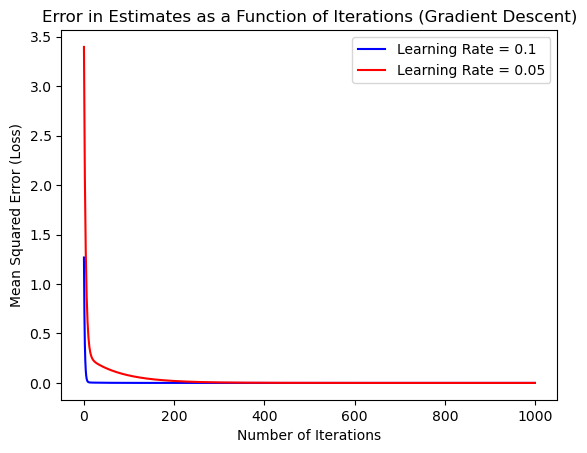

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#getting random data points for x
x = np.linspace(0, 1, 100)
y_true = x  #because m = 1 and c = 0

#function to perform gradient descent
def gradient_descent(learning_rate, iterations):
    #get parameters m, c randomly
    m = np.random.randn()
    c = np.random.randn()
    
    #empty array for loss
    losses = []
    
    for i in range(iterations):
        y_pred = m * x + c
        loss = np.mean((y_true - y_pred) ** 2)
        losses.append(loss)
        dL_dm = -2 * np.mean(x * (y_true - y_pred))  
        dL_dc = -2 * np.mean(y_true - y_pred)       
        
        #update parameters using gradient descent
        m -= learning_rate * dL_dm
        c -= learning_rate * dL_dc
    
    return losses

#running gradient descent with two different learning rates
iterations = 1000
learning_rate_1 = 0.1
learning_rate_2 = 0.05

losses_lr1 = gradient_descent(learning_rate_1, iterations)
losses_lr2 = gradient_descent(learning_rate_2, iterations)


plt.plot(range(iterations), losses_lr1, label=f'Learning Rate = {learning_rate_1}', color='blue')
plt.plot(range(iterations), losses_lr2, label=f'Learning Rate = {learning_rate_2}', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Error in Estimates as a Function of Iterations (Gradient Descent)')
plt.legend()




**Doing what we did above for y = mx + nx^2 + c with true parameters being m = 0.5 n = 1 and c = 1. The range of x is between 0 to 1.**

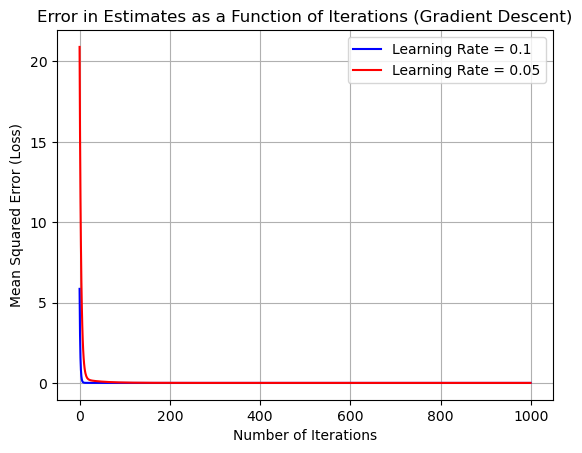

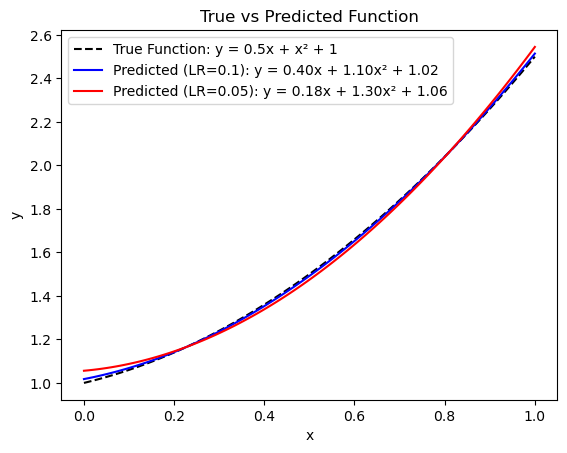

Final parameters with LR=0.1: m = 0.4004, n = 1.0960, c = 1.0177
Final parameters with LR=0.05: m = 0.1847, n = 1.3040, c = 1.0560


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate training data
x = np.linspace(0, 1, 100)
y_true = 0.5 * x + 1 * x**2 + 1  # True function: y = 0.5x + x^2 + 1

# Function to perform gradient descent
def gradient_descent(learning_rate, iterations):
    # Initialize parameters (m, n, c) randomly
    m = np.random.randn()
    n = np.random.randn()
    c = np.random.randn()
    
    # Track loss for plotting
    losses = []
    
    for i in range(iterations):
        # Predict y values using the current m, n, and c
        y_pred = m * x + n * x**2 + c
        
        # Compute the loss (Mean Squared Error)
        loss = np.mean((y_true - y_pred) ** 2)
        losses.append(loss)
        
        # Compute gradients w.r.t. m, n, and c
        dL_dm = -2 * np.mean(x * (y_true - y_pred))      # Partial derivative w.r.t. m
        dL_dn = -2 * np.mean(x**2 * (y_true - y_pred))   # Partial derivative w.r.t. n
        dL_dc = -2 * np.mean(y_true - y_pred)           # Partial derivative w.r.t. c
        
        # Update parameters using gradient descent
        m -= learning_rate * dL_dm
        n -= learning_rate * dL_dn
        c -= learning_rate * dL_dc
    
    return losses, m, n, c

# Run gradient descent with two different learning rates
iterations = 1000
learning_rate_1 = 0.1
learning_rate_2 = 0.05

losses_lr1, m1, n1, c1 = gradient_descent(learning_rate_1, iterations)
losses_lr2, m2, n2, c2 = gradient_descent(learning_rate_2, iterations)

# Plot the error (loss) as a function of iterations
plt.plot(range(iterations), losses_lr1, label=f'Learning Rate = {learning_rate_1}', color='blue')
plt.plot(range(iterations), losses_lr2, label=f'Learning Rate = {learning_rate_2}', color='red')

# Labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Error in Estimates as a Function of Iterations (Gradient Descent)')
plt.grid(True)
plt.legend()
plt.show()

# Final trained model visualization
y_pred1 = m1 * x + n1 * x**2 + c1
y_pred2 = m2 * x + n2 * x**2 + c2

plt.plot(x, y_true, label='True Function: y = 0.5x + x² + 1', color='black', linestyle='dashed')
plt.plot(x, y_pred1, label=f'Predicted (LR={learning_rate_1}): y = {m1:.2f}x + {n1:.2f}x² + {c1:.2f}', color='blue')
plt.plot(x, y_pred2, label=f'Predicted (LR={learning_rate_2}): y = {m2:.2f}x + {n2:.2f}x² + {c2:.2f}', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()

# Print final parameters
print(f"Final parameters with LR={learning_rate_1}: m = {m1:.4f}, n = {n1:.4f}, c = {c1:.4f}")
print(f"Final parameters with LR={learning_rate_2}: m = {m2:.4f}, n = {n2:.4f}, c = {c2:.4f}")


**Doing the same for y = tanh(m*x + c). Where m = 1 and c = 2 and x ranges from 0 to 2**

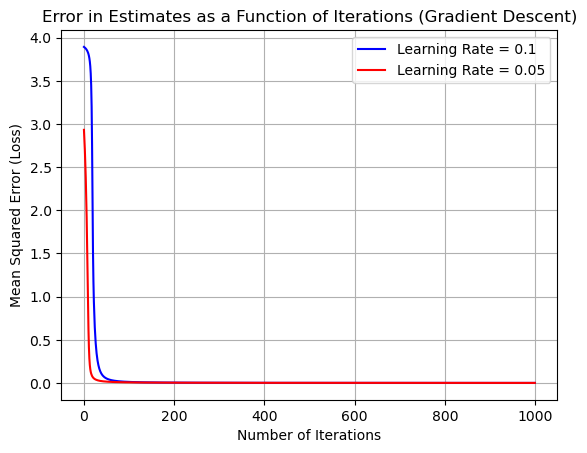

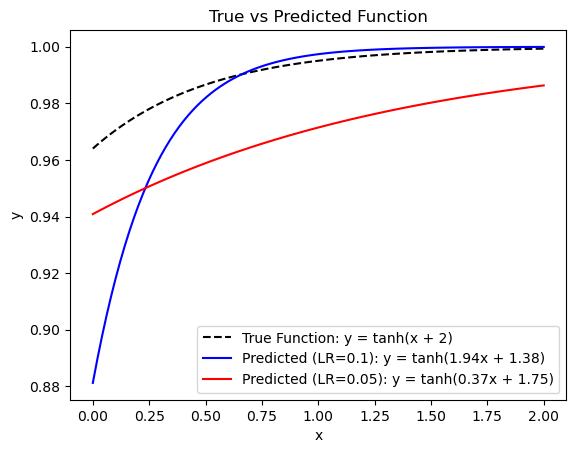

Final parameters with LR=0.1: m = 1.9367, c = 1.3812
Final parameters with LR=0.05: m = 0.3722, c = 1.7456


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate training data
x = np.linspace(0, 2, 100)
y_true = np.tanh(1 * x + 2)  # True function: y = tanh(m*x + c) with m=1, c=2

# Function to perform gradient descent
def gradient_descent_tanh(learning_rate, iterations):
    # Initialize parameters (m, c) randomly
    m = np.random.randn()
    c = np.random.randn()
    
    # Track the loss for plotting
    losses = []
    
    for i in range(iterations):
        # Predict y values using the current m and c
        y_pred = np.tanh(m * x + c)
        
        # Compute the loss (Mean Squared Error)
        loss = np.mean((y_true - y_pred) ** 2)
        losses.append(loss)
        
        # Compute gradients w.r.t. m and c
        dL_dy = -2 * (y_true - y_pred)  # Derivative of loss w.r.t y_pred
        dy_dm = (1 - y_pred**2) * x    # Derivative of tanh(m*x + c) w.r.t. m
        dy_dc = (1 - y_pred**2)        # Derivative of tanh(m*x + c) w.r.t. c
        
        dL_dm = np.mean(dL_dy * dy_dm) # Chain rule for m
        dL_dc = np.mean(dL_dy * dy_dc) # Chain rule for c
        
        # Update parameters using gradient descent
        m -= learning_rate * dL_dm
        c -= learning_rate * dL_dc
    
    return losses, m, c

# Run gradient descent with two different learning rates
iterations = 1000
learning_rate_1 = 0.1
learning_rate_2 = 0.05

losses_lr1, m1, c1 = gradient_descent_tanh(learning_rate_1, iterations)
losses_lr2, m2, c2 = gradient_descent_tanh(learning_rate_2, iterations)

# Plot the error (loss) as a function of iterations
plt.plot(range(iterations), losses_lr1, label=f'Learning Rate = {learning_rate_1}', color='blue')
plt.plot(range(iterations), losses_lr2, label=f'Learning Rate = {learning_rate_2}', color='red')

# Labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Error in Estimates as a Function of Iterations (Gradient Descent)')
plt.grid(True)
plt.legend()
plt.show()

# Final trained model visualization
y_pred1 = np.tanh(m1 * x + c1)
y_pred2 = np.tanh(m2 * x + c2)

plt.plot(x, y_true, label='True Function: y = tanh(x + 2)', color='black', linestyle='dashed')
plt.plot(x, y_pred1, label=f'Predicted (LR={learning_rate_1}): y = tanh({m1:.2f}x + {c1:.2f})', color='blue')
plt.plot(x, y_pred2, label=f'Predicted (LR={learning_rate_2}): y = tanh({m2:.2f}x + {c2:.2f})', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()

# Print final parameters
print(f"Final parameters with LR={learning_rate_1}: m = {m1:.4f}, c = {c1:.4f}")
print(f"Final parameters with LR={learning_rate_2}: m = {m2:.4f}, c = {c2:.4f}")


<h3>ML Basics</h3>

**Write a function to compute the (multiclass) logistic loss (also called the cross-entropy loss) given the parameters (W,b) of a linear model (as numpy arrays) and an example (x, y).**

In [30]:
import numpy as np

#this function is for a multiclass logistic regression.
def multiclass_logistic_loss(W, b, x, y):
    #compute logits
    z = np.dot(W, x) + b  

    #compute softmax probabilities
    exp_z = np.exp(z - np.max(z))
    probs = exp_z / np.sum(exp_z)

    #compute cross-entropy loss for the correct class y
    loss = -np.log(probs[y])  
    
    return loss


In [32]:
# Example with 3 classes and 4 features
np.random.seed(42)
W = np.random.randn(3, 4)  
b = np.random.randn(3)  
x = np.array([0.5, -1.2, 3.3, 0.8]) 
y = 1  # True class label

loss = multiclass_logistic_loss(W, b, x, y)
print(f"Cross-entropy loss: {loss:.4f}")


Cross-entropy loss: 0.6618


**Now we do the same by using a lambda1 and lambda regularization.**

In [33]:
import numpy as np

def multiclass_logistic_loss_with_regularization(W, b, x, y, lambda1=0.0, lambda2=0.0):
    
    z = np.dot(W, x) + b
    exp_z = np.exp(z - np.max(z)) 
    probs = exp_z / np.sum(exp_z)
    cross_entropy_loss = -np.log(probs[y])
    l1_loss = lambda1 * np.sum(np.abs(W))  # L1 norm
    l2_loss = lambda2 * np.sum(W**2)      # L2 norm
    total_loss = cross_entropy_loss + l1_loss + l2_loss
    
    return total_loss


In [34]:
# Example with 3 classes and 4 features
np.random.seed(42)
W = np.random.randn(3, 4)  # (num_classes=3, num_features=4)
b = np.random.randn(3)  # (num_classes=3)
x = np.array([0.5, -1.2, 3.3, 0.8])  # Example input (num_features=4)
y = 1  # True class label

# Regularization strengths
lambda1 = 0.01  # L1 strength
lambda2 = 0.01  # L2 strength

loss = multiclass_logistic_loss_with_regularization(W, b, x, y, lambda1, lambda2)
print(f"Cross-entropy loss with regularization: {loss:.4f}")


Cross-entropy loss with regularization: 0.8088


<h3>Classification pipeline</h3>

**Generating Data**

In [35]:
import numpy as np
import pickle
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))

**Visualizing the data**

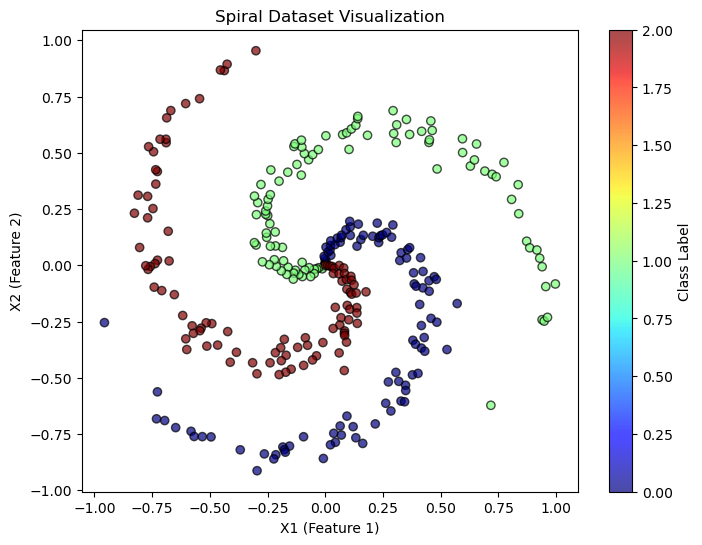

In [36]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the dataset from the saved pickle files
X = pickle.load(open('dataX.pickle', 'rb'))  # Load feature matrix
y = pickle.load(open('dataY.pickle', 'rb'))  # Load labels

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', edgecolor='k', alpha=0.7)

# Add labels and title
plt.xlabel("X1 (Feature 1)")
plt.ylabel("X2 (Feature 2)")
plt.title("Spiral Dataset Visualization")
plt.colorbar(label="Class Label")  # Add color legend for classes

# Show the plot
plt.show()


**Spliting the data into test(20%) and train(80%)**

In [37]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

# Load the dataset
X = pickle.load(open('dataX.pickle', 'rb'))  # Feature matrix
y = pickle.load(open('dataY.pickle', 'rb'))  # Labels

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 240 samples
Testing set size: 60 samples


**Build a linear classifier assuming the multiclass logistic loss and an l2 regularization for the weights only. Report the prediction accuracy on the training data and the test data and show appropriate plots.**

Iteration 0, Loss: 1.0953
Iteration 100, Loss: 0.9234
Iteration 200, Loss: 0.8700
Iteration 300, Loss: 0.8506
Iteration 400, Loss: 0.8428
Iteration 500, Loss: 0.8394
Iteration 600, Loss: 0.8379
Iteration 700, Loss: 0.8372
Iteration 800, Loss: 0.8369
Iteration 900, Loss: 0.8367
Training Accuracy: 52.50%
Test Accuracy: 45.00%


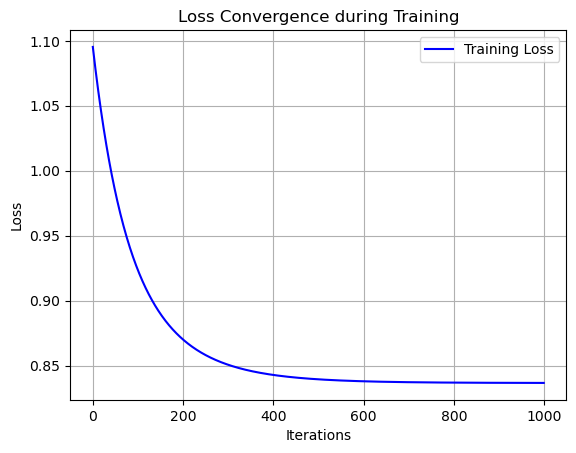

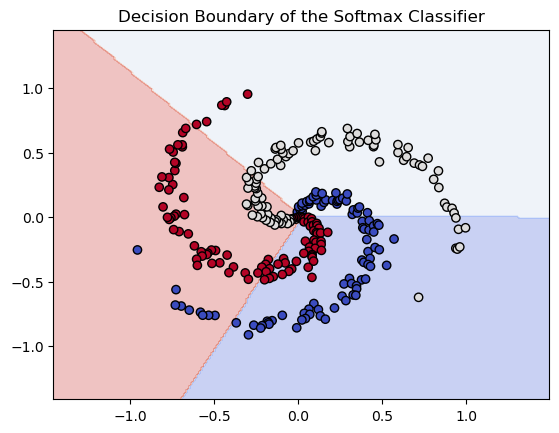

In [39]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
X = pickle.load(open('dataX.pickle', 'rb'))  # Feature matrix (N x D)
y = pickle.load(open('dataY.pickle', 'rb'))  # Labels (N,)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Initialize parameters
D = X.shape[1]  # Number of features
K = len(np.unique(y))  # Number of classes
W = np.random.randn(D, K) * 0.01  # Small random weights (D x K)
b = np.zeros((1, K))  # Bias vector (1 x K)

# Hyperparameters
learning_rate = 0.1
lambda_reg = 0.01  # L2 regularization strength
iterations = 1000
losses = []

# Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Compute Loss (Cross-Entropy with L2 Regularization)
def compute_loss(X, y_onehot, W, b, lambda_reg):
    N = X.shape[0]
    scores = np.dot(X, W) + b
    probs = softmax(scores)
    loss = -np.sum(y_onehot * np.log(probs)) / N  # Cross-entropy loss
    loss += (lambda_reg / 2) * np.sum(W**2)  # L2 Regularization (Only on W)
    return loss

# Gradient Descent Training
for i in range(iterations):
    # Compute predictions
    scores = np.dot(X_train, W) + b
    probs = softmax(scores)
    
    # Compute gradients
    N = X_train.shape[0]
    dW = (np.dot(X_train.T, (probs - y_train_onehot)) / N) + (lambda_reg * W)  # L2 Regularization on W
    db = np.sum(probs - y_train_onehot, axis=0, keepdims=True) / N
    
    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # Compute and store loss
    loss = compute_loss(X_train, y_train_onehot, W, b, lambda_reg)
    losses.append(loss)

    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

# Predictions
def predict(X, W, b):
    scores = np.dot(X, W) + b
    probs = softmax(scores)
    return np.argmax(probs, axis=1)

# Compute Accuracy
y_train_pred = predict(X_train, W, b)
y_test_pred = predict(X_test, W, b)
train_accuracy = np.mean(y_train_pred == y_train) * 100
test_accuracy = np.mean(y_test_pred == y_test) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot Loss Curve
plt.plot(range(iterations), losses, label="Training Loss", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Convergence during Training")
plt.grid(True)
plt.legend()
plt.show()

# Decision Boundary Plot
def plot_decision_boundary(X, y, W, b):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()], W, b)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Decision Boundary of the Softmax Classifier")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, W, b)


In [40]:
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
X = pickle.load(open('dataX.pickle', 'rb'))
y = pickle.load(open('dataY.pickle', 'rb'))

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter grid for L2 regularization
lambda_values = [0.001, 0.01, 0.1, 1, 10]  # Different levels of L2 regularization

best_lambda = None
best_cv_score = 0

# Perform 5-fold cross-validation to select best L2 regularization parameter
for lambda_value in lambda_values:
    model = LogisticRegression(penalty='l2', C=1/lambda_value, solver='lbfgs', multi_class='multinomial', max_iter=500)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    avg_cv_score = np.mean(cv_scores)
    
    print(f"Lambda: {lambda_value}, Cross-validation Accuracy: {avg_cv_score:.4f}")
    
    if avg_cv_score > best_cv_score:
        best_cv_score = avg_cv_score
        best_lambda = lambda_value

print(f"Best Lambda (L2 Regularization Strength): {best_lambda}")

# Train final model with best lambda
final_model = LogisticRegression(penalty='l2', C=1/best_lambda, solver='lbfgs', multi_class='multinomial', max_iter=500)
final_model.fit(X_train, y_train)

# Evaluate on test data
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")


Lambda: 0.001, Cross-validation Accuracy: 0.5292
Lambda: 0.01, Cross-validation Accuracy: 0.5292
Lambda: 0.1, Cross-validation Accuracy: 0.5292
Lambda: 1, Cross-validation Accuracy: 0.5292
Lambda: 10, Cross-validation Accuracy: 0.5292
Best Lambda (L2 Regularization Strength): 0.001
Final Training Accuracy: 0.5375
Final Test Accuracy: 0.4500


/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:124

**What is the sensitivity of the model's performance to different learning rates and the number of gradient descent iterations. Describe via suitable plots.**

First we analyze learning rate and iterations

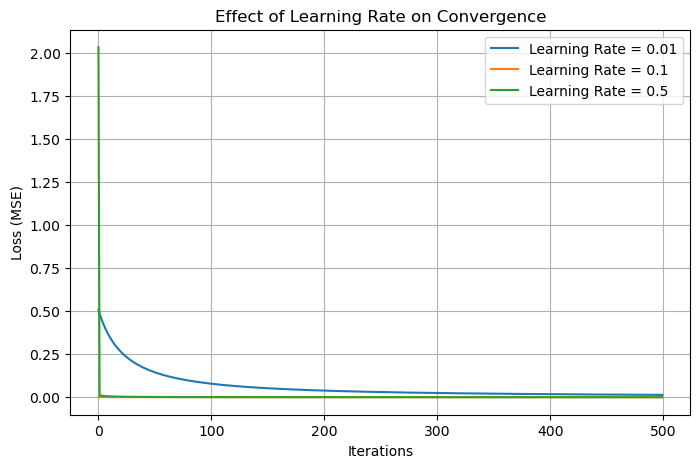

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 2, 100)  # Feature values from 0 to 2
y_true = np.tanh(1 * X + 2)  # True function: y = tanh(m*x + c) with m=1, c=2

# Gradient Descent Function
def gradient_descent(learning_rate, iterations):
    m, c = np.random.randn(), np.random.randn()  # Random initialization
    losses = []

    for i in range(iterations):
        y_pred = np.tanh(m * X + c)  # Model output
        loss = np.mean((y_true - y_pred) ** 2)  # Mean Squared Error (MSE)
        losses.append(loss)

        # Compute gradients
        dL_dm = -2 * np.mean((y_true - y_pred) * (1 - y_pred**2) * X)  # Chain rule for tanh
        dL_dc = -2 * np.mean((y_true - y_pred) * (1 - y_pred**2))

        # Update parameters
        m -= learning_rate * dL_dm
        c -= learning_rate * dL_dc
    
    return losses

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 0.5]
iterations = 500

plt.figure(figsize=(8,5))
for lr in learning_rates:
    losses = gradient_descent(lr, iterations)
    plt.plot(range(iterations), losses, label=f'Learning Rate = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid()
plt.show()


Now we see the effect of iteration

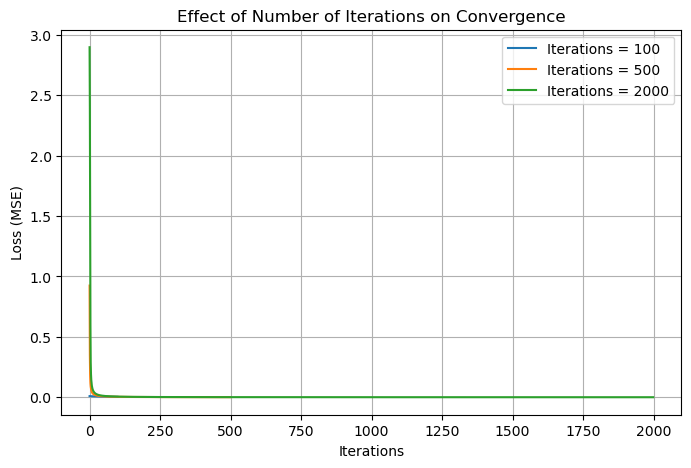

In [42]:
iterations_list = [100, 500, 2000]
learning_rate = 0.1

plt.figure(figsize=(8,5))
for iters in iterations_list:
    losses = gradient_descent(learning_rate, iters)
    plt.plot(range(iters), losses, label=f'Iterations = {iters}')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Effect of Number of Iterations on Convergence')
plt.legend()
plt.grid()
plt.show()


**What is the sensitivity of the model's performance to different regularization parameter values. Find the best regularization parameter using an exhaustive search procedure. Describe your choice via suitable plots. What is the performance difference between using regularization and no regularization?**

/var/folders/0j/1g3jmm6926q7z2l_xjtkb6h40000gn/T/ipykernel_35982/4182512758.py:16: RuntimeWarning: overflow encountered in scalar multiply
  loss = np.mean((y_true - y_pred) ** 2) + lambda_reg * (m**2 + c**2)  # L2 regularization term
/var/folders/0j/1g3jmm6926q7z2l_xjtkb6h40000gn/T/ipykernel_35982/4182512758.py:16: RuntimeWarning: overflow encountered in scalar power
  loss = np.mean((y_true - y_pred) ** 2) + lambda_reg * (m**2 + c**2)  # L2 regularization term
/var/folders/0j/1g3jmm6926q7z2l_xjtkb6h40000gn/T/ipykernel_35982/4182512758.py:20: RuntimeWarning: overflow encountered in scalar multiply
  dL_dm = -2 * np.mean((y_true - y_pred) * (1 - y_pred**2) * X) + 2 * lambda_reg * m  # Regularized gradient
/var/folders/0j/1g3jmm6926q7z2l_xjtkb6h40000gn/T/ipykernel_35982/4182512758.py:21: RuntimeWarning: overflow encountered in scalar multiply
  dL_dc = -2 * np.mean((y_true - y_pred) * (1 - y_pred**2)) + 2 * lambda_reg * c  # Regularized gradient
/var/folders/0j/1g3jmm6926q7z2l_xjtkb6h40

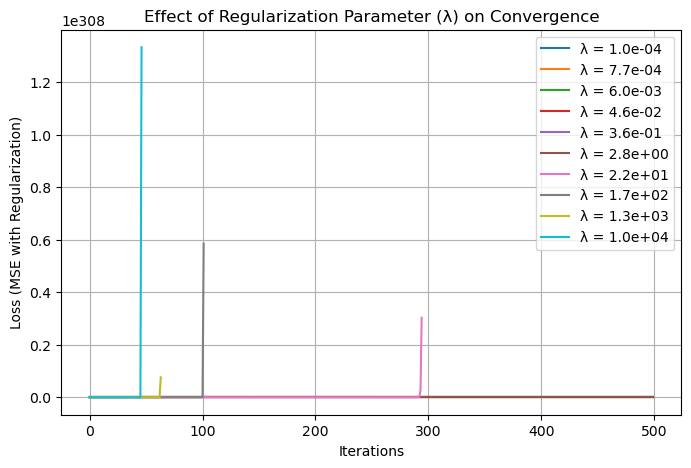

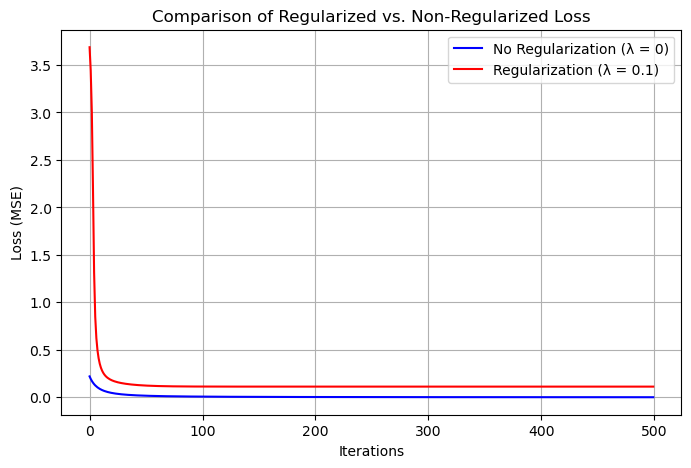

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 2, 100)  # Feature values from 0 to 2
y_true = np.tanh(1 * X + 2)  # True function: y = tanh(m*x + c) with m=1, c=2

# Gradient Descent with L2 Regularization
def gradient_descent_with_regularization(learning_rate, iterations, lambda_reg):
    m, c = np.random.randn(), np.random.randn()  # Random initialization
    losses = []

    for i in range(iterations):
        y_pred = np.tanh(m * X + c)  # Model output
        loss = np.mean((y_true - y_pred) ** 2) + lambda_reg * (m**2 + c**2)  # L2 regularization term
        losses.append(loss)

        # Compute gradients
        dL_dm = -2 * np.mean((y_true - y_pred) * (1 - y_pred**2) * X) + 2 * lambda_reg * m  # Regularized gradient
        dL_dc = -2 * np.mean((y_true - y_pred) * (1 - y_pred**2)) + 2 * lambda_reg * c  # Regularized gradient

        # Update parameters
        m -= learning_rate * dL_dm
        c -= learning_rate * dL_dc
    
    return losses

# Experiment with different lambda values (regularization strength)
lambda_values = np.logspace(-4, 4, 10)  # Range of lambda from 1e-4 to 1e4
iterations = 500
learning_rate = 0.1

plt.figure(figsize=(8,5))
for lambda_reg in lambda_values:
    losses = gradient_descent_with_regularization(learning_rate, iterations, lambda_reg)
    plt.plot(range(iterations), losses, label=f'λ = {lambda_reg:.1e}')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE with Regularization)')
plt.title('Effect of Regularization Parameter (λ) on Convergence')
plt.legend()
plt.grid(True)
plt.show()

# Compare performance with and without regularization
no_regularization_losses = gradient_descent_with_regularization(learning_rate, iterations, 0)  # λ = 0
optimal_lambda_reg = 0.1  # Chosen from above plots (can be determined via cross-validation or by analysis)

regularized_losses = gradient_descent_with_regularization(learning_rate, iterations, optimal_lambda_reg)

# Plot both cases
plt.figure(figsize=(8,5))
plt.plot(range(iterations), no_regularization_losses, label='No Regularization (λ = 0)', color='blue')
plt.plot(range(iterations), regularized_losses, label=f'Regularization (λ = {optimal_lambda_reg})', color='red')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Comparison of Regularized vs. Non-Regularized Loss')
plt.legend()
plt.grid(True)
plt.show()


**What is the sensitivity of the model's performance with respect to a different test train split (e.g., 50%:50%).**

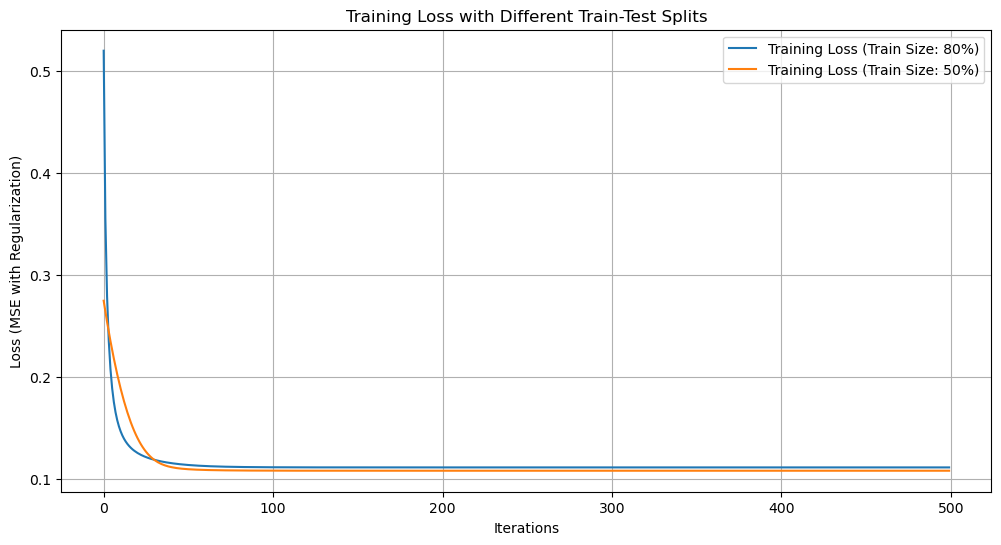

Train-Test Split 80%-19%:
Final Training Loss: 0.1113
Test Loss: 0.1180

Train-Test Split 50%-50%:
Final Training Loss: 0.1080
Test Loss: 0.1177



In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 2, 100)  # Feature values from 0 to 2
y_true = np.tanh(1 * X + 2)  # True function: y = tanh(m*x + c) with m=1, c=2

# Gradient Descent with Regularization
def gradient_descent_with_regularization(X_train, y_train, learning_rate, iterations, lambda_reg):
    m, c = np.random.randn(), np.random.randn()  # Random initialization
    losses = []

    for i in range(iterations):
        y_pred = np.tanh(m * X_train + c)  # Model output
        loss = np.mean((y_train - y_pred) ** 2) + lambda_reg * (m**2 + c**2)  # L2 regularization term
        losses.append(loss)

        # Compute gradients
        dL_dm = -2 * np.mean((y_train - y_pred) * (1 - y_pred**2) * X_train) + 2 * lambda_reg * m  # Regularized gradient
        dL_dc = -2 * np.mean((y_train - y_pred) * (1 - y_pred**2)) + 2 * lambda_reg * c  # Regularized gradient

        # Update parameters
        m -= learning_rate * dL_dm
        c -= learning_rate * dL_dc
    
    return m, c, losses

# Train and evaluate model on different train-test splits
def evaluate_performance(split_ratio):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=1-split_ratio, random_state=42)

    # Hyperparameters
    learning_rate = 0.1
    iterations = 500
    lambda_reg = 0.1

    # Train the model using gradient descent with regularization
    m, c, losses_train = gradient_descent_with_regularization(X_train, y_train, learning_rate, iterations, lambda_reg)

    # Calculate the loss on the test set
    y_pred_test = np.tanh(m * X_test + c)
    test_loss = np.mean((y_test - y_pred_test) ** 2) + lambda_reg * (m**2 + c**2)

    return losses_train, test_loss

# Experiment with different train-test splits
split_ratios = [0.8, 0.5]  # 80% training, 50% training
results = {}

for ratio in split_ratios:
    train_losses, test_loss = evaluate_performance(ratio)
    results[ratio] = {
        'train_loss': train_losses[-1],  # Final train loss
        'test_loss': test_loss,
        'train_losses': train_losses,
    }

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training loss over iterations
for ratio in split_ratios:
    plt.plot(results[ratio]['train_losses'], label=f'Training Loss (Train Size: {int(ratio*100)}%)')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE with Regularization)')
plt.title('Training Loss with Different Train-Test Splits')
plt.legend()
plt.grid(True)
plt.show()

# Print final test loss for comparison
for ratio in split_ratios:
    print(f"Train-Test Split {int(ratio*100)}%-{int((1-ratio)*100)}%:")
    print(f"Final Training Loss: {results[ratio]['train_loss']:.4f}")
    print(f"Test Loss: {results[ratio]['test_loss']:.4f}\n")


<h3>Feedforward Neural Networks</h3>

In [46]:
pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 32.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 34.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 33.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 34.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [48]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to be compatible with Keras (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to one-hot encoded
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Build the 2-Layer Feedforward Neural Network (with ReLU)**

In [49]:
# Define the model with standard ReLU activation
model_relu = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (MNIST digits)
])

# Compile the model
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_relu = model_relu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 769us/step - accuracy: 0.8817 - loss: 0.4270 - val_accuracy: 0.9590 - val_loss: 0.1372
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.9626 - loss: 0.1254 - val_accuracy: 0.9689 - val_loss: 0.0986
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.9764 - loss: 0.0809 - val_accuracy: 0.9710 - val_loss: 0.0892
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9819 - loss: 0.0592 - val_accuracy: 0.9770 - val_loss: 0.0781
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.9856 - loss: 0.0469 - val_accuracy: 0.9773 - val_loss: 0.0738
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9903 - loss: 0.0324 - val_accuracy: 0.9782 - val_loss: 0.0713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9758 - val_loss: 0.0829
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.9930 - loss: 0.02

**Leaky ReLU activation**

In [50]:
# Define the model with Leaky ReLU activation
model_leaky_relu = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.01),  # Leaky ReLU with alpha=0.01
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (MNIST digits)
])

# Compile the model
model_leaky_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_leaky_relu = model_leaky_relu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


/opt/anaconda3/envs/cs418env/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.8768 - loss: 0.4353 - val_accuracy: 0.9582 - val_loss: 0.1358
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.9622 - loss: 0.1267 - val_accuracy: 0.9683 - val_loss: 0.1094
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.9762 - loss: 0.0809 - val_accuracy: 0.9733 - val_loss: 0.0878
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.9826 - loss: 0.0587 - val_accuracy: 0.9777 - val_loss: 0.0753
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9867 - loss: 0.0436 - val_accuracy: 0.9778 - val_loss: 0.0726
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9744 - val_loss: 0.0844
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.9910 - loss: 0.0274 - val_accuracy: 0.9763 - val_loss: 0.0823
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.9938 - loss: 0.02

**Now we wil try to use different optimizers**

In [51]:
# Test with SGD optimizer (for comparison)
model_sgd = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with SGD
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7366 - loss: 1.0179 - val_accuracy: 0.9034 - val_loss: 0.3551
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9016 - loss: 0.3534 - val_accuracy: 0.9191 - val_loss: 0.2916
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.9169 - loss: 0.2977 - val_accuracy: 0.9278 - val_loss: 0.2608
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.9267 - loss: 0.2640 - val_accuracy: 0.9341 - val_loss: 0.2372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9314 - loss: 0.2439 - val_accuracy: 0.9394 - val_loss: 0.2189
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9396 - loss: 0.2194 - val_accuracy: 0.9434 - val_loss: 0.2026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9443 - loss: 0.2010 - val_accuracy: 0.9454 - val_loss: 0.1897
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9482 -

**Trying to change the number of hidden unites**

In [52]:
# Model with fewer hidden units
model_fewer_units = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model with more hidden units
model_more_units = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])


**Evaluating the Model**

In [53]:
# Evaluate the models
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test)
test_loss_leaky_relu, test_acc_leaky_relu = model_leaky_relu.evaluate(x_test, y_test)

print(f"Test accuracy (ReLU): {test_acc_relu * 100:.2f}%")
print(f"Test accuracy (Leaky ReLU): {test_acc_leaky_relu * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9704 - loss: 0.1044
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.9755 - loss: 0.0941
Test accuracy (ReLU): 97.54%
Test accuracy (Leaky ReLU): 97.76%
